<a href="https://colab.research.google.com/github/Re-venger/Machine-Learning-tutorials/blob/main/KMeans_MathCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

In [87]:
centroids = [(-5,-5), (5,5), (-2.5, 2.5)]
cluster_std = [1,1,1]

In [88]:
x,y = make_blobs(n_samples=100,cluster_std=cluster_std, centers=centroids, n_features=2, random_state=2)

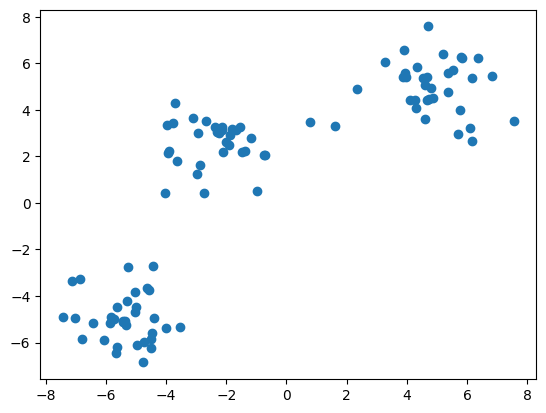

In [89]:
plt.scatter(x[:,0], x[:,1])

In [90]:
from re import T
class KMeans:

  def __init__(self, n_clusters=2, max_iter=100):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None

  def fit_predict(self, x):
    # select any two points as centroids
    random_index = random.sample(range(0, x.shape[0]),self.n_clusters)
    self.centroids = x[random_index]

    for iter in range(self.max_iter):
      # assign clusters
      cluster_group = self.assign_clusters(x)
      old_centroids = self.centroids
      # move centroids
      self.centroids = self.move_centroids(x, cluster_group)
      if(old_centroids == self.centroids).all():
        break
    return cluster_group


  def assign_clusters(self, x):
    # return -> array of clusters
    cluster_group = []
    distances = []

    for row in x:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
      min_distance = min(distances)
      index_pos = distances.index(min_distance)
      cluster_group.append(index_pos)
      distances.clear()

    return np.array(cluster_group)



  def move_centroids(self,x, cluster_group):
    new_centroids = []
    cluster_types = np.unique(cluster_group)

    for ctype in cluster_types:
      mn = x[cluster_group == ctype].mean(axis=0)
      new_centroids.append(mn)

    return np.array(new_centroids)

In [91]:
km = KMeans(n_clusters=3, max_iter=100)
y_means = km.fit_predict(x)

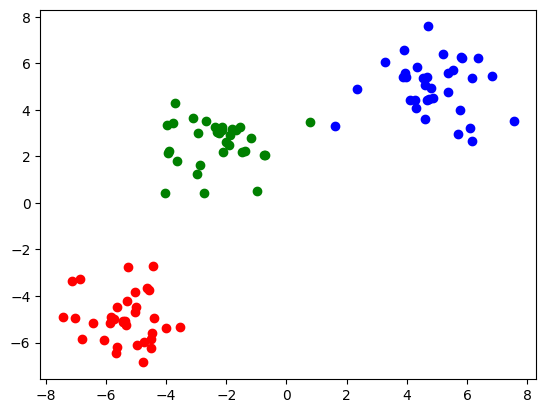

In [92]:
plt.scatter(x[y_means == 0,0], x[y_means == 0,1], color="red");
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], color="green");
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], color="blue");